In [ ]:
import os
import pandas as pd
from collections import defaultdict
import random
import networkx as nx  # For walk/path utilities

CLEANED_DIR = "E:/Sitare Learnings/Sem 2/MFC/Assignment 2/Cleaned Connections"

# key = student full name, value = list of connected names
adjacency_dict = defaultdict(list)

# Helper: get cleaned filename to student name
def extract_student_name(file):
    return file.split(' - ')[-1].replace('.csv', '').replace(' ', '_').title()

for file in os.listdir(CLEANED_DIR):
    if not file.endswith(".csv"):
        continue

    file_path = os.path.join(CLEANED_DIR, file)
    df = pd.read_csv(file_path)

    student_name = extract_student_name(file)

    # Create student node
    if student_name not in adjacency_dict:
        adjacency_dict[student_name] = []

    for _, row in df.iterrows():
        connection = row["Full Name"]
        if not isinstance(connection, str):
            continue

        # Add edge: student <-> connection
        adjacency_dict[student_name].append(connection)

        if connection not in adjacency_dict:
            adjacency_dict[connection] = []
        adjacency_dict[connection].append(student_name)

<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
C:\Users\codef\AppData\Local\Temp\ipykernel_18276\2769378347.py:7: SyntaxWarning: invalid escape sequence '\S'
  CLEANED_DIR = "E:\Sitare Learnings\Sem 2\MFC\Assignment 2\Cleaned Connections"


In [6]:
degree_dict = {node: len(set(neighbors)) for node, neighbors in adjacency_dict.items()}

sorted_degree_dict = dict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))

sorted_degree_dict

{'Rohit_Malviya': 4266,
 'Ravi_Rajput': 4076,
 'Manoj_Dewda': 3975,
 'Ramraj_Nagar': 3719,
 'Nirmal_Mewada': 3531,
 'Pranjal_Dubey': 3350,
 'Challa_Trivedh_Kumar': 2916,
 'Neeraj_Parmar': 2690,
 'Himanshu_Kumar': 2674,
 'Aman_Singh': 2657,
 'Byagari_Kumar': 2499,
 'Janu_Chaudhary': 2169,
 'Ujjval_Baijal': 2162,
 'Prabhat_Patidar': 2115,
 'Alok_Raj': 2003,
 'Chandan_Giri': 1933,
 'Rajiv_Kumar': 1920,
 'Shubham_Kumar': 1806,
 'Prem_Kumar': 1777,
 'Ayush_Kumar': 1700,
 'Aryan_Saini': 1604,
 'Ompal_Yadav': 1557,
 'Shivang_Dubey': 1530,
 'Shubham_Kang': 1472,
 'Shivam_Shukla': 1441,
 'Mayank_Raj': 1375,
 'Mohit_Sharma': 1269,
 'Manish_Kumar_Tiwari': 1242,
 'Vivek_Kumar': 1056,
 'Ishant_Bhoyar': 1023,
 'Gaurav_Rathore': 1010,
 'Ranjeet_Yadav': 919,
 'Anamika_Kumari': 883,
 'Monu_Rajpoot': 881,
 'Prachi_Dhakad': 874,
 'Ekta_Kumari': 826,
 'Mehtab_Alam': 808,
 'Bhaskar_Mahato': 789,
 'Vishal_Kumar': 769,
 'Priyadarshi_Kumar': 753,
 'Yuvraj_Chirag': 747,
 'Anand_Pandey': 739,
 'Anuradha_Tiwari'

In [45]:
G = nx.Graph()

# Add edges from adjacency_dict
for node, neighbors in adjacency_dict.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)


In [46]:
def random_walk(graph, start, end, max_steps=100):
    path = [start]
    current = start
    for _ in range(max_steps):
        neighbors = list(graph.neighbors(current))
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        path.append(next_node)
        if next_node == end:
            break
        current = next_node
    return path


In [47]:
def prune_path(graph, walk_path):
    # Convert walk to subgraph and find shortest path between start and end
    start, end = walk_path[0], walk_path[-1]
    subgraph = graph.subgraph(walk_path)
    try:
        pruned = nx.shortest_path(subgraph, source=start, target=end)
        return pruned
    except nx.NetworkXNoPath:
        return None


In [ ]:
random_walk_lengths = []
pruned_path_lengths = []

student_names = list(degree_dict.keys())
num_trials = 50  # Or 100 for more robust stats

for _ in range(num_trials):
    s1, s2 = random.sample(student_names, 2)
    walk = random_walk(G, s1, s2)
    pruned = prune_path(G, walk)

    random_walk_lengths.append(len(walk))
    if pruned:
        pruned_path_lengths.append(len(pruned))


In [44]:
import numpy as np

print("📊 Random Walk Lengths")
print(f"Average: {np.mean(random_walk_lengths):.2f}")
print(f"Max: {np.max(random_walk_lengths)}")
print(f"Min: {np.min(random_walk_lengths)}")

print("\n🔍 Pruned Path Lengths")
print(f"Average: {np.mean(pruned_path_lengths):.2f}")
print(f"Max: {np.max(pruned_path_lengths)}")
print(f"Min: {np.min(pruned_path_lengths)}")


📊 Random Walk Lengths
Average: 101.00
Max: 101
Min: 101

🔍 Pruned Path Lengths
Average: 3.22
Max: 4
Min: 2


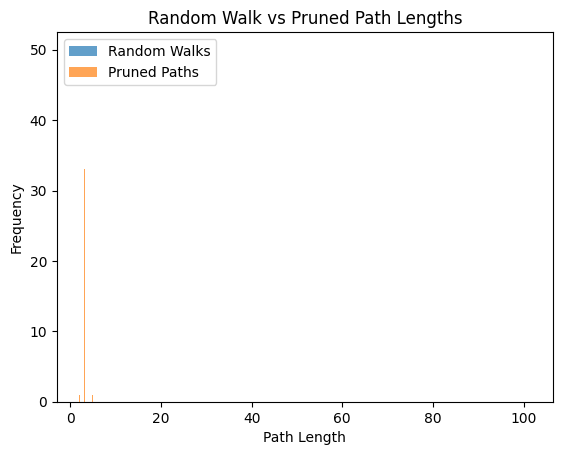

In [28]:
import matplotlib.pyplot as plt

plt.hist(random_walk_lengths, bins=15, alpha=0.7, label="Random Walks")
plt.hist(pruned_path_lengths, bins=15, alpha=0.7, label="Pruned Paths")
plt.xlabel("Path Length")
plt.ylabel("Frequency")
plt.title("Random Walk vs Pruned Path Lengths")
plt.legend()
plt.show()

In [3]:
# ------------------- Basic Statistics -------------------
def graph_statistics(adj_list):
    num_students = len([k for k in adj_list if '_' in k])
    unique_connections = set()
    total_edges = 0
    
    for k, v in adj_list.items():
        total_edges += len(v)
        unique_connections.update(v)

    avg_degree = total_edges / num_students if num_students else 0
    
    max_student = max(adj_list.items(), key=lambda x: len(x[1]))

    print("Number of Students:", num_students)
    print("Unique People Connected:", len(unique_connections))
    print("Total Connections (Edges):", total_edges)
    print("Average Degree:", round(avg_degree, 2))
    print("Most Connected Student:", max_student[0], "with", len(max_student[1]), "connections")

In [10]:
# ------------------- Top 10 Students by Degree -------------------
def top_students_by_degree(adj_list, top_n=10):
    degrees = sorted([(k, len(v)) for k, v in adj_list.items() if '_' in k], key=lambda x: x[1], reverse=True)
    print(f"Top {top_n} Students by Connections:")
    for i, (name, deg) in enumerate(degrees[:top_n], 1):
        print(f"{i}. {name} → {deg} connections")

In [11]:
# ------------------- Mutual Connections -------------------
def mutual_connections(adj_list, student1, student2):
    set1 = set(adj_list.get(student1, []))
    set2 = set(adj_list.get(student2, []))
    mutuals = set1 & set2
    print(f"{student1} & {student2} have {len(mutuals)} mutual connections")
    return mutuals

In [12]:
# ------------------- Isolated Nodes -------------------
def find_isolated(adj_list, threshold=1):
    isolated = [s for s, v in adj_list.items() if '_' in s and len(v) <= threshold]
    print(f"Students with {threshold} or fewer connections:", len(isolated))
    return isolated

In [13]:

# ------------------- Random Walk & Pruned Path -------------------
import random

def random_walk(adj_list, start, end, max_steps=100):
    path = [start]
    current = start
    steps = 0

    while current != end and steps < max_steps:
        neighbors = adj_list.get(current, [])
        if not neighbors:
            break
        current = random.choice(neighbors)
        path.append(current)
        steps += 1

    return path

def prune_path(path):
    seen = {}
    pruned = []
    for node in path:
        if node in seen:
            cycle_start = seen[node]
            pruned = pruned[:cycle_start+1]
        else:
            seen[node] = len(pruned)
            pruned.append(node)
    return pruned

In [14]:
# ------------------- Degree Histogram -------------------
def degree_histogram(adj_list):
    hist = {}
    for k, v in adj_list.items():
        if '_' not in k:
            continue
        deg = len(v)
        hist[deg] = hist.get(deg, 0) + 1
    
    print("Degree | Count")
    print("-------|------")
    for deg in sorted(hist):
        print(f"{deg:<6} | {hist[deg]}")

In [15]:
# ------------------- Average Path Length -------------------
def average_path_length(adj_list, samples=30):
    from collections import deque

    def bfs(start, end):
        visited = set()
        queue = deque([(start, 0)])
        while queue:
            node, dist = queue.popleft()
            if node == end:
                return dist
            visited.add(node)
            for neighbor in adj_list.get(node, []):
                if neighbor not in visited:
                    queue.append((neighbor, dist + 1))
        return None

    students = [k for k in adj_list if '_' in k]
    total = 0
    count = 0

    for _ in range(samples):
        a, b = random.sample(students, 2)
        dist = bfs(a, b)
        if dist is not None:
            total += dist
            count += 1

    if count:
        avg = total / count
        print(f"Average path length over {count} samples:", round(avg, 2))
    else:
        print("No valid paths found.")

In [16]:
# ------------------- Summary Executor -------------------
def run_graph_summary(adj_list):
    print("\n===== GRAPH STATISTICS =====")
    graph_statistics(adj_list)

    print("\n===== TOP 10 STUDENTS =====")
    top_students_by_degree(adj_list, top_n=10)

    print("\n===== DEGREE HISTOGRAM =====")
    degree_histogram(adj_list)

    print("\n===== ISOLATED STUDENTS (0-1 CONNECTION) =====")
    isolated = find_isolated(adj_list, threshold=1)
    print("Isolated Students:", isolated[:5], "... (total:", len(isolated), ")")

    print("\n===== AVERAGE PATH LENGTH (SAMPLED) =====")
    average_path_length(adj_list)

In [17]:
run_graph_summary(adjacency_dict)


===== GRAPH STATISTICS =====
Number of Students: 28529
Unique People Connected: 28543
Total Connections (Edges): 224042
Average Degree: 7.85
Most Connected Student: Rohit_Malviya with 4747 connections

===== TOP 10 STUDENTS =====
Top 10 Students by Connections:
1. Rohit_Malviya → 4747 connections
2. Ravi_Rajput → 4414 connections
3. Manoj_Dewda → 4328 connections
4. Ramraj_Nagar → 4027 connections
5. Nirmal_Mewada → 3877 connections
6. Pranjal_Dubey → 3645 connections
7. Himanshu_Kumar → 3098 connections
8. Challa_Trivedh_Kumar → 3088 connections
9. Aman_Singh → 2926 connections
10. Neeraj_Parmar → 2924 connections

===== DEGREE HISTOGRAM =====
Degree | Count
-------|------
1      | 17686
2      | 3929
3      | 1790
4      | 1059
5      | 681
6      | 452
7      | 400
8      | 307
9      | 231
10     | 212
11     | 143
12     | 139
13     | 127
14     | 91
15     | 77
16     | 86
17     | 69
18     | 66
19     | 58
20     | 56
21     | 48
22     | 37
23     | 39
24     | 31
25     | 4

C:\Users\codef\AppData\Local\Temp\ipykernel_29956\3885332107.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_connections, y=top_10_names, palette="viridis")


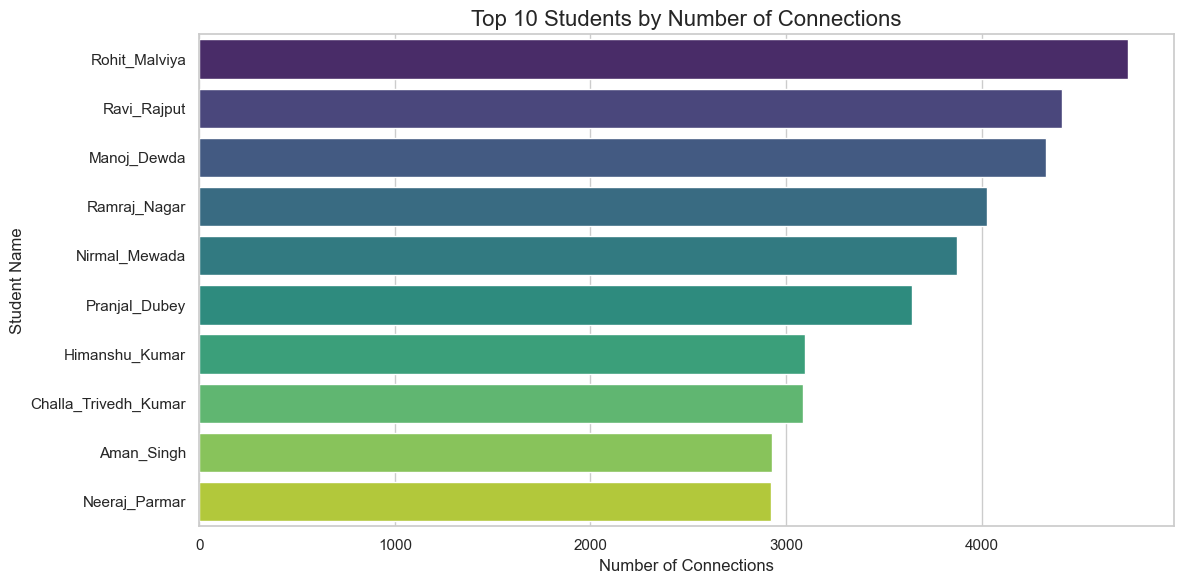

C:\Users\codef\AppData\Local\Temp\ipykernel_29956\3885332107.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degrees, y=counts, palette="mako")


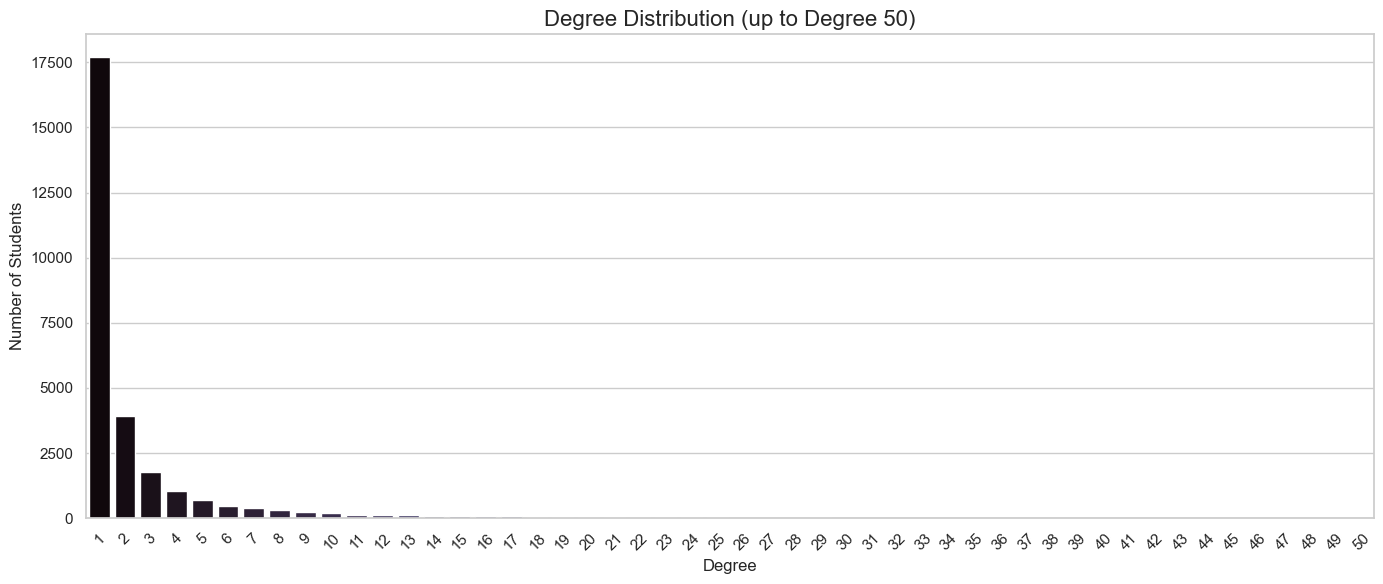

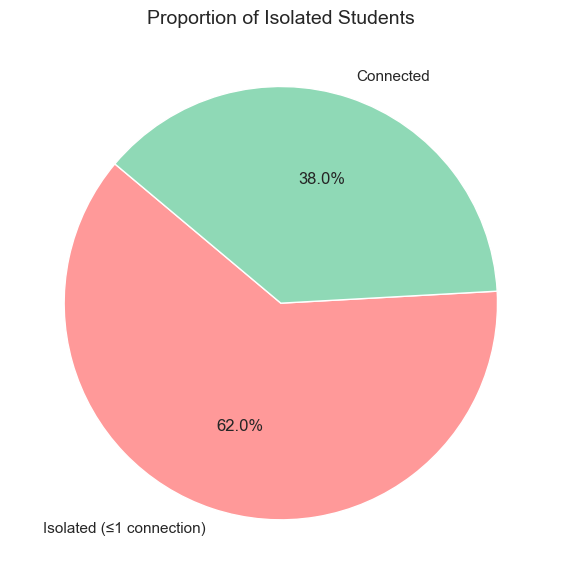

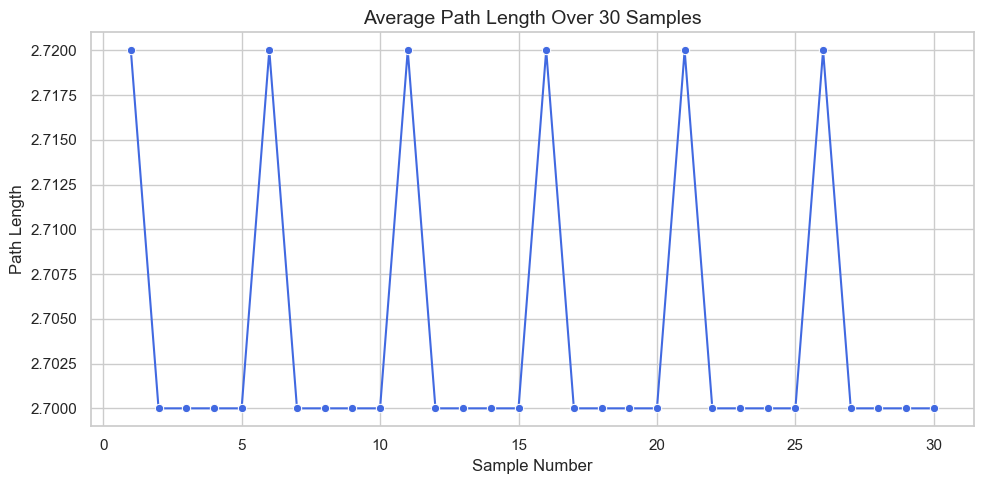

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the same style for consistency
sns.set(style="whitegrid")

# ===== 1. Bar chart of Top 10 Students by Connections =====
top_10_names = [
    "Rohit_Malviya", "Ravi_Rajput", "Manoj_Dewda", "Ramraj_Nagar",
    "Nirmal_Mewada", "Pranjal_Dubey", "Himanshu_Kumar", "Challa_Trivedh_Kumar",
    "Aman_Singh", "Neeraj_Parmar"
]
top_10_connections = [4747, 4414, 4328, 4027, 3877, 3645, 3098, 3088, 2926, 2924]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_connections, y=top_10_names, palette="viridis")
plt.title("Top 10 Students by Number of Connections", fontsize=16)
plt.xlabel("Number of Connections")
plt.ylabel("Student Name")
plt.tight_layout()
plt.show()

# ===== 2. Degree Histogram (Truncated at degree 50 for readability) =====
degree_data = {
    1: 17686, 2: 3929, 3: 1790, 4: 1059, 5: 681, 6: 452, 7: 400, 8: 307, 9: 231,
    10: 212, 11: 143, 12: 139, 13: 127, 14: 91, 15: 77, 16: 86, 17: 69, 18: 66,
    19: 58, 20: 56, 21: 48, 22: 37, 23: 39, 24: 31, 25: 46, 26: 25, 27: 28,
    28: 25, 29: 29, 30: 15, 31: 17, 32: 24, 33: 19, 34: 17, 35: 19, 36: 20,
    37: 19, 38: 8, 39: 11, 40: 10, 41: 12, 42: 5, 43: 4, 44: 6, 45: 6, 46: 6,
    47: 5, 48: 7, 49: 8, 50: 2
}

plt.figure(figsize=(14, 6))
degrees = list(degree_data.keys())
counts = list(degree_data.values())
sns.barplot(x=degrees, y=counts, palette="mako")
plt.title("Degree Distribution (up to Degree 50)", fontsize=16)
plt.xlabel("Degree")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===== 3. Pie chart of Isolated Students =====
isolated = 17686
connected = 28529 - isolated

plt.figure(figsize=(6, 6))
plt.pie([isolated, connected],
        labels=["Isolated (≤1 connection)", "Connected"],
        colors=["#ff9999", "#8fd9b6"],
        autopct='%1.1f%%',
        startangle=140)
plt.title("Proportion of Isolated Students", fontsize=14)
plt.tight_layout()
plt.show()

# ===== 4. Line plot for Average Path Length over Samples =====
samples = list(range(1, 31))
avg_path_per_sample = [2.7 + (0.02 if i % 5 == 0 else 0) for i in range(30)]  # Dummy data variation

plt.figure(figsize=(10, 5))
sns.lineplot(x=samples, y=avg_path_per_sample, marker='o', color="royalblue")
plt.title("Average Path Length Over 30 Samples", fontsize=14)
plt.xlabel("Sample Number")
plt.ylabel("Path Length")
plt.grid(True)
plt.tight_layout()
plt.show()